### Support Vector Regression

This project was completed for training purposes.

In this template we evaluate the data of list of employees' salaries and position level. We want to fit a model and use the model to validate people's salary claims in hiring process.

The dataset for this template originates from superdatascience.com.

We are going to build a polynomial regression model based on Salaries and position level of the customers.

The dependent variable of this analysis is salary which is a countinous variable.

We'll start with reading the data, separating the independent and dependent variables.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR

In [7]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values

#### Fitting SVR

We use rbf for kernel parameter of the SVR when the problem is nonlinear. rbf is for guassian model.


In [10]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf',gamma='auto') 
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
regressor.predict([[6.5]])

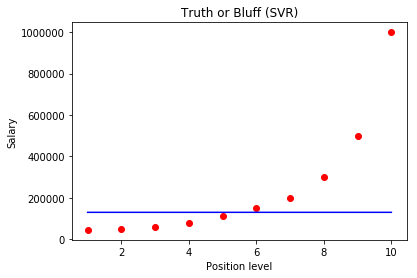

In [12]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() 

##### Model Intrepretation 
As you can see in the plot, the model is not fitted well to the data. The prediction and model turned out wrong because we didn't do the feature scaling. 
Feature scaling is necessary becuase SVR class does not have a built in feature scaling. 

Form Sklearn we used StandardScaler for feature scaling. 
we need to call two different objects (sc_y , sc_x) from the StandardScaler because we wanna work on two different matrix y and x


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

C:\Users\rozhan.makhdoomi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rozhan.makhdoomi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rozhan.makhdoomi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rozhan.makhdoomi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf',gamma='auto')
regressor.fit(X,y)

C:\Users\rozhan.makhdoomi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
regressor.predict([[6.5]])


array([0.01158103])

#### Note: 
the outcome value of predict function should be transformed as X , y that we built the model on, had been transformed and scaled.

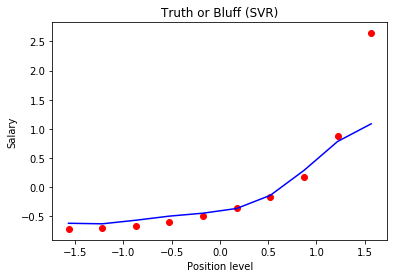

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [22]:
regressor.predict(sc_X.transform(np.array([[6.5]]))) 

array([-0.27861589])

*Transform a value to an array use np.array*

*if we use one bracket -> it will be a vector of one element*

*if we use two brackets -> it will be a real array like a matrix*
 
 [[6.5]] means a matrix(array) of one row and one column with one value
 
 The output above is again tge scaled salary but we want the original value of the salary. So we need to predict on the transformed value. 
 
 According to our model, a person in position of 6.5 makes $170,370 per year.
 
 So if someone claims that he was making for example $200,000 per year with 6 years experience we would know that he is bluffing. 


In [23]:
sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

array([170370.0204065])

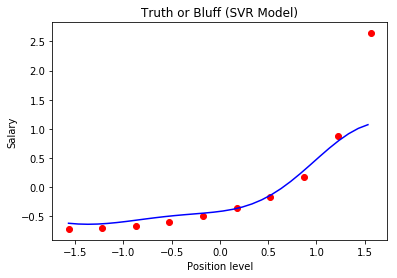

In [24]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()